In [60]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial.distance import hamming


In [86]:
class Hopfield:
    def __init__(self, n):
        self.n = n
        self.states = np.random.choice([-1, 1], n)
        self.biases = np.random.uniform(-1, 1, n)
        self.weights = np.random.uniform(-1, 1, (n, n)) * np.tri(n, n, -1)
        self.weights = self.weights + self.weights.T
        
    def update(self):
        x = np.random.randint(0, self.n)
        deltaE = self.checkEnergyChange(x)
        # Ebefore = self.checkEnergy()
        # self.states[x] *= -1
        # Eafter = self.checkEnergy()
        # deltaEHard = Eafter - Ebefore
        
        # print(f"delta E: {deltaE}")
        # print(f"deltaEHard: {deltaEHard}")
        if deltaE < 0:
            self.states[x] *= -1
                
    # def checkSpecificEnergy(self, x):
    #     return -(1/2) * self.states[x] * self.weights[x] @ self.states + self.biases[x] * self.states[x]
            
    def checkEnergyChange(self, x):
        # Ebefore = self.biases[x] * self.states[x]
        # for i in range(len(self.states)):
        #     Ebefore += self.weights[i][x] * self.states[i] * self.states[x]
        # Eafter = self.biases[x] * self.states[x] * -1
        # for i in range(len(self.states)):
        #     Eafter += self.weights[i][x] * self.states[i] * self.states[x] * -1
        # return Eafter - Ebefore
        
        Ebefore = -(1/2) * self.states[x] * self.weights[x] @ self.states + self.biases[x] * self.states[x]
        Eafter = -(1/2) * -self.states[x] * self.weights[x] @ self.states + self.biases[x] * -self.states[x]
        
        # Ebefore = self.checkEnergy()
        # self.states[x] *= -1
        # Eafter = self.checkEnergy()
        # self.states[x] *= -1
        return Eafter - Ebefore
    
    def hasConverged(self):
        for i in range(len(self.states)):
            deltaE = self.checkEnergyChange(i)
            if deltaE < 0:
                return False
        return True
    
    def checkEnergy(self):
        # E = 0
        # for i in range(len(self.states)):
        #     for j in range(len(self.states)):
        #         E += self.weights[i][j] * self.states[i] * self.states[j]
        # E = E * 1/2
        # for i in range(len(self.states)):
        #     E += self.biases[i] * self.states[i]
        # return E
        return -(1/2) * self.states.T @ self.weights @ self.states + self.biases @ self.states 
    
    def printState(self):
        print(self.states)
    
    def setState(self, state):
        self.states = state
        
    def setStateFromString(self, string):
        for i in range(len(string)):
            if string[i] == '0':
                self.states[i] = -1
            else:
                self.states[i] = 1
                
    def setWeightsFromString(self, strings): # this needs to store -1 and 1, not 0 and 1
        # self.weights = np.zeros((self.n, self.n))
        # for i in range(len(strings)):
        #     v = np.array(list(strings[i]), dtype=int)
        #     self.weights = self.weights + np.outer(v, v.T)
        # self.weights = self.weights / len(strings)
        strings = [np.array(list(string), dtype=int) for string in strings]
        imgs = np.array([st.flatten() for st in strings])
        imgs = [x * 2 - 1 for x in imgs]
        self.weights = (1/len(strings)) * sum([np.outer(st, st) for st in imgs])
                
    def stateAsImage(self):
        return self.states.reshape(int(np.sqrt(self.n)), int(np.sqrt(self.n)))
    
    def runUntilConverge(self):
        while(not self.hasConverged()):
            self.update()
            print(self.checkEnergy())
            
    def outputString(self):
        tmep = (self.states + 1) / 2
        tmep = np.array(tmep, dtype=int)
        tmep = np.array(tmep, dtype=str)
        return "".join(tmep)
    
    def UpdateNeuron(self, neuron):
        deltaE = self.checkEnergyChange(neuron)
        if deltaE < 0:
            self.states[neuron] *= -1

In [62]:
h = Hopfield(100)
h.printState()
print(h.checkEnergy())
while(not h.hasConverged()):
    h.update()
    # h.printState()
    print(h.checkEnergy())

[ 1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1 -1
  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1
  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1
 -1  1 -1  1]
1.696881450298977
1.696881450298977
2.1875869894440045
0.05148973533194923
-15.841448234476612
-15.841448234476612
-31.73552897494277
-43.584495227870875
-61.75347720458919
-61.75347720458919
-61.75347720458919
-67.9735378734803
-67.9735378734803
-77.88983039101771
-77.88983039101771
-77.88983039101771
-77.88983039101771
-90.90494314460082
-113.40161635151269
-113.40161635151269
-113.40161635151269
-114.61141619645056
-124.6926007876438
-131.05174269087306
-131.05174269087306
-144.62436165583378
-144.62436165583378
-144.62436165583378
-147.12625150914113
-147.12625150914113
-147.12625150914113
-147.12625150914113
-147.12625150914113
-147.12625150914113
-147.12625150914113
-147.12625150

In [69]:
n = 100
runs = []
for h in tqdm(range(10)):
    Es = []
    h = Hopfield(n)
    count = 0
    while(not h.hasConverged()):
        h.update()
        count = count + 1
        if (count == n):
            Es.append(h.checkEnergy())
            count = 0
    runs.append(Es)

100%|██████████| 10/10 [00:01<00:00,  6.12it/s]


9
7
6
6
17
7
8
15
12
11


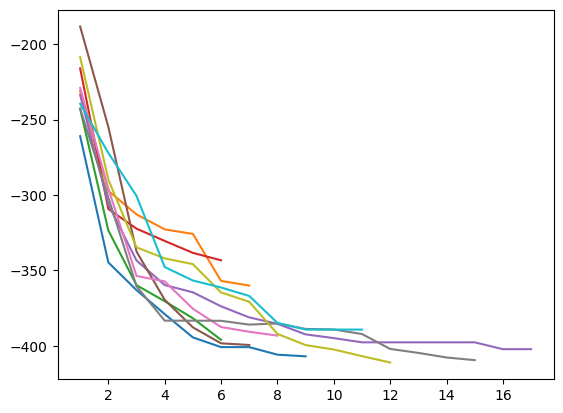

In [70]:
fig, ax = plt.subplots()

for i in range(len(runs)):
    print(len(runs[i]))
    ax.plot(np.linspace(1, len(runs[i]), len(runs[i])), runs[i])

In [71]:
# prove monotonically decreasing
for i in range(len(runs)):
    change =  np.array(runs[i][1:]) - np.array(runs[i][:-1])
    for j in change:
        if j > 0:
            print("problem:")
            print(j)

problem:
0.760146897106722


In [9]:
frown = "0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001"
frownCorrupted = "0000000000000000000000000000000000000000000010000000000000000001110000001000100001000001101000000001"
tree = "0001111000000111100000001100000000110000001111111000001100100000110000000011000000001100000000110000"

In [10]:
def messUpString(uh, k):
    places = np.random.randint(0, len(uh), k)
    bs = np.array(list(uh), dtype=int)
    mask = np.zeros_like(bs)
    mask[places] = 1
    temp = bs + mask
    temp = [a % 2 for a in temp]
    out = ""
    for i in temp:
        out = out + str(i)
    return out
muckedUpFrown = messUpString(frown, 10)
muckedUpTree = messUpString(tree, 10)

0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001


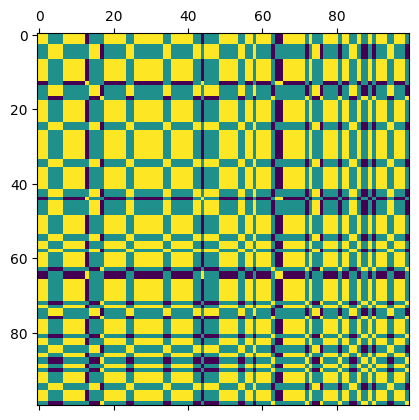

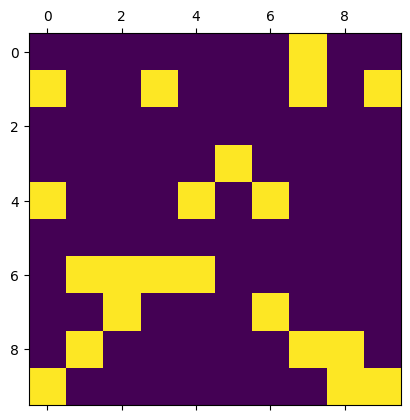

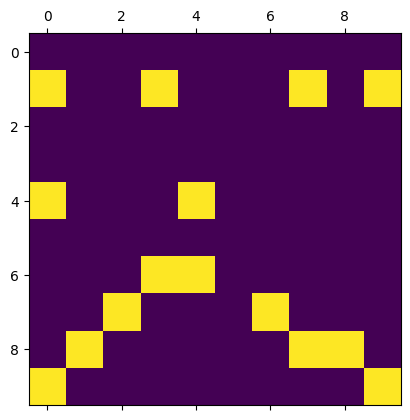

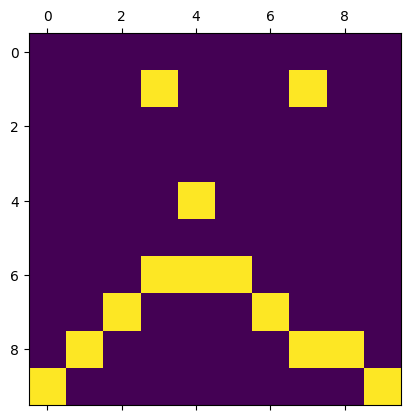

In [81]:
h = Hopfield(100)
h.setWeightsFromString([tree, frown])
h.setStateFromString(muckedUpFrown)
plt.matshow(h.weights)
plt.matshow(h.stateAsImage())
h.biases = np.ones(100)
for i in range(80):
    h.update()
plt.matshow(h.stateAsImage())
while(not h.hasConverged()):
    h.update()
    # print(h.checkEnergy())
# for i in range(len(h.weights)):
#     print(h.weights[i])
plt.matshow(h.stateAsImage())
print(h.outputString())

In [42]:
def GenerateMemories(k):
    out = []
    for i in range(k):
        nums = np.random.choice(["0", "1"], (100))
        st = "".join(nums)
        out.append(st)
    return out
GenerateMemories(3)

['0111110101000001000001010100011111111100110001101001000001001001010100000000100000010101100100100110',
 '0110100101010100101111100010110001011110001101111011010101010101011011010001111101100110001000001001',
 '1010011010001100110110011100100000110111001001100001101011101111101001110110101010111010011111101001']

In [52]:
p_max = 100
k_max = 60
storage = np.zeros((p_max, k_max))
tries = 10

for p in tqdm(range(1, p_max)):
    tries = 10
    if p < tries:
        tries = p
    for k in range(k_max):
        perfectMemories = GenerateMemories(p)
        # print(perfectMemories)
        # messedUpMemories = []
        h = Hopfield(100)
        h.setWeightsFromString(perfectMemories)
        
        for i in range(tries):
            mess = messUpString(perfectMemories[i], k)
            h.setStateFromString(mess)
            while(not h.hasConverged()):
                h.update()
            # print(perfectMemories[i])
            # print(h.outputString())
            storage[p, k] += hamming(list(perfectMemories[i]), list(h.outputString()))
            # messedUpMemories.append()
        storage[p, k] / tries 
        
print(storage)
    

100%|██████████| 99/99 [1:23:17<00:00, 50.48s/it]

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [1.42 1.73 1.5  ... 4.77 4.26 4.39]
 [1.36 1.46 1.72 ... 4.82 4.67 4.37]
 [2.06 1.44 1.75 ... 4.61 4.36 4.51]]


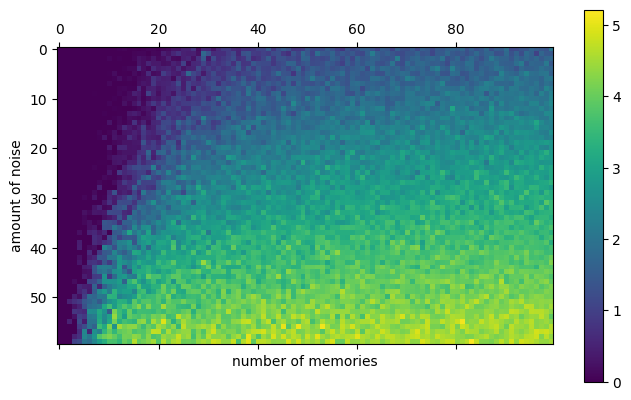

In [85]:
plt.matshow(storage.T)
plt.xlabel("number of memories")
plt.ylabel("amount of noise")
plt.colorbar()

In [127]:
h = Hopfield(6)
memories = ["011001", "111000"]
for i in tqdm(range(2**6)):
    b = bin(i)[2:]
    h.setWeightsFromString(memories)
    for j in range(len(h.states)):
        h.setStateFromString(b)
        h.UpdateNeuron(j)
        a = h.outputString()
        if not a == b:
            print(str(int(b,2)) + " -> " + str(int(a, 2)))

100%|██████████| 64/64 [00:00<00:00, 5769.21it/s]

0 -> 44
0 -> 12
0 -> 12
0 -> 8
0 -> 8
0 -> 8
1 -> 40
1 -> 56
1 -> 56
1 -> 56
1 -> 56
1 -> 56
2 -> 40
2 -> 56
2 -> 40
2 -> 40
2 -> 40
2 -> 40
3 -> 56
3 -> 56
3 -> 56
3 -> 56
3 -> 56
3 -> 56
4 -> 32
4 -> 32
4 -> 40
4 -> 32
4 -> 34
4 -> 34
5 -> 42
5 -> 42
5 -> 42
5 -> 42
5 -> 42
5 -> 42
6 -> 50
6 -> 34
6 -> 58
6 -> 50
6 -> 50
6 -> 50
7 -> 58
7 -> 58
7 -> 58
7 -> 58
7 -> 56
7 -> 56
8 -> 32
8 -> 32
8 -> 40
8 -> 32
8 -> 34
8 -> 34
9 -> 38
9 -> 38
9 -> 38
9 -> 38
9 -> 38
9 -> 38
10 -> 42
10 -> 42
10 -> 42
10 -> 42
10 -> 42
10 -> 42
11 -> 46
11 -> 46
11 -> 38
11 -> 46
11 -> 46
11 -> 46
12 -> 50
12 -> 34
12 -> 58
12 -> 50
12 -> 50
12 -> 50
13 -> 54
13 -> 38
13 -> 54
13 -> 54
13 -> 54
13 -> 54
14 -> 58
14 -> 58
14 -> 58
14 -> 58
14 -> 56
14 -> 56
15 -> 60
15 -> 60
15 -> 60
15 -> 56
15 -> 60
15 -> 60
16 -> 32
16 -> 32
16 -> 40
16 -> 32
16 -> 34
16 -> 32
17 -> 34
17 -> 34
17 -> 34
17 -> 38
17 -> 34
17 -> 34
18 -> 36
18 -> 36
18 -> 36
18 -> 36
18 -> 38
18 -> 36
19 -> 38
19 -> 38
19 -> 38
19 -> 38
1

In [88]:
z = 21
bin(z)[2:]

'10101'